## 畳み込み
---
### 1.1 畳み込みの使用方法
画像をテンソルとして扱う用意

In [3]:
import torch
import torchvision
from torchvision import transforms

image_size = 32
train_image_dir = "./data/train"
val_image_dir = "./data/val"

data_transfrom = {
    'train': transforms.Compose([transforms.RandomResizedCrop(image_size), 
                                 transforms.ToTensor()]),
    'val': transforms.Compose([transforms.RandomResizedCrop(image_size), 
                                 transforms.ToTensor()]),
}

tensor_train_dataset = torchvision.datasets.ImageFolder(
                            root=train_image_dir,
                            transform=data_transfrom["train"])
tensor_val_dataset = torchvision.datasets.ImageFolder(
                            root=val_image_dir,
                            transform=data_transfrom["val"])

img1_t, label = tensor_train_dataset[0]
print("type:{}, label:{}, shape:{}, dtype:{}".format(
                                                type(img1_t),
                                                label,
                                                img1_t.shape,
                                                img1_t.dtype))

type:<class 'torch.Tensor'>, label:0, shape:torch.Size([3, 32, 32]), dtype:torch.float32


PyTorchには1次元、2次元、3次元のデータを対象にした畳み込み処理が用意されている。今回の実験では画像(2次元)のデータを扱っているので nn.Conv2d を使用します。nn.Conv2d を用意するには3つの引数が最低限必要になる。1つ目は入力特徴量の数（フルカラー画像の場合はRGBの3チャネルなので3）、2つ目は出力特徴量の数、3つ目はカーネルサイズ

In [5]:
import torch.nn as nn

conv = nn.Conv2d(3, 16, kernel_size=3)
print(conv)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))


In [6]:
print("weight: {}, bias: {}".format(conv.weight.shape, conv.bias.shape))

weight: torch.Size([16, 3, 3, 3]), bias: torch.Size([16])


In [7]:
img, label = tensor_train_dataset[0]
output = conv(img.unsqueeze(0))
print("img_shape: {}".format(img.unsqueeze(0).shape))
print("output_shape: {}".format(output.shape))

img_shape: torch.Size([1, 3, 32, 32])
output_shape: torch.Size([1, 16, 30, 30])


Text(0.5, 1.0, 'output')

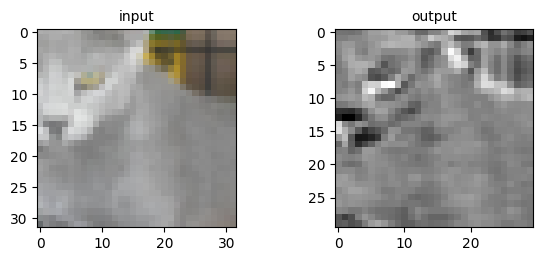

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output[0, 2].detach(), cmap="gray")
ax2.set_title("output", fontsize=10)

In [13]:
conv2 = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output2 = conv2(img.unsqueeze(0))
print("img_shap:{}".format(img.unsqueeze(0).shape))
print("output2_shape:{}".format(output2.shape))

img_shap:torch.Size([1, 3, 32, 32])
output2_shape:torch.Size([1, 1, 32, 32])


Text(0.5, 1.0, 'output2')

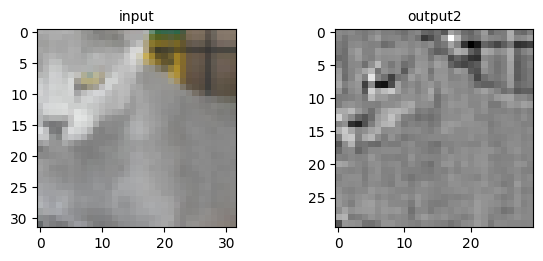

In [16]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output[0, 0].detach(), cmap="gray")
ax2.set_title("output2", fontsize=10)

Text(0.5, 1.0, 'output3')

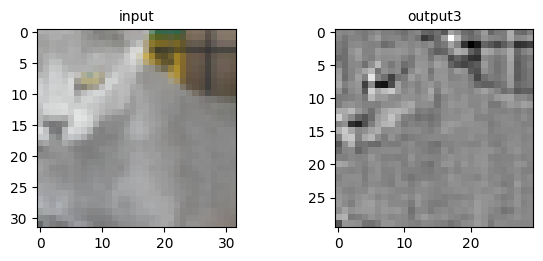

In [19]:
conv3 = nn.Conv2d(3, 16, kernel_size=3)

with torch.no_grad():
    conv3.bias.zero_()

with torch.no_grad():
    conv3.weight.fill_(1.0/9.0)

output3 = conv3(img.unsqueeze(0))

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output[0, 0].detach(), cmap="gray")
ax2.set_title("output3", fontsize=10)
